<a href="https://colab.research.google.com/github/Welle-Kim/Python-of-strand/blob/master/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C_%EC%BD%94%EB%A1%9C%EB%82%98_%ED%99%95%EC%A7%84%EC%9E%90_%EB%B0%9C%EC%83%9D_%EB%8F%99%ED%96%A5_%EB%B6%84%EC%84%9D%EC%9D%98_%EC%82%AC%EB%B3%B8_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 수집 VS 크롤링**

웹사이트의 내용을 읽어오는 것 => 웹 데이터 수집, 스크래핑

검색엔진이 하이퍼링크를 타고 웹페이지의 내용을 읽어가는 것 => 크롤링



**수집해도 되는 페이지인지 확인하기**

1. 로봇 배제 표준 robots.txt

 / : to  경로

 ex.네이버는  Disallow/

2. 저작권



3. 무리한 네트워크 요청

 time.sleep() 함수사용

**서울시 코로나 확진 동향 사이트의 데이터 수집방법**

1. 수집하고자하는 페이지의 URL을 알아본다.
2. 파이썬의 작은 브라우저 requests를 통해 URL에 접근한다
3. response.status_code가 200 OK 라면 정상응답
4. request의 response 값에서 response.txt만 받아옵니다.
5. html 텍스트를 받아왔다면 bs(response.txt,'html.parser')로 해석합니다.
6. soup.select를 통해 원하는 태그에 접근합니다.
7. 목록을 먼저 받아옵니다.
8. 목록에서 행을 하나씩 가져옵니다.
9. 행을 모아서 데이터프레임으로 만듭니다.

=> 판다스라면 read_html로 table로 태그에 대해 위 과정을 코드 한 줄로 해줍니다.


**JSON**

java script의 key value

:json은 판다스가 읽고 쓸 수 있는 자료형태

pd.DataFrame([[키-값쌍으로 추출한 2차원 리스트]])
=> 데이터프레임으로 변환됨

**서울시 코로나 발생현황 데이터 수집 순서**

1. 페이지별 데이터를 수집
2. 전체 페이지를 수집
3. pd.concat([전체데이터리스트])로 데이터를 하나로 병합
4. 데이터 전처리(html 태그제거)
5. to_csv로 전체 데이터 병합
6. pd.read_csv로 데이터가 잘 저장되었는지 읽어와서 확인
7. 수집 끝! 분석 시작!

In [1]:
import pandas as pd

In [2]:
url= "https://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
''' read_html으로 컬럼명을 불러오고, 데이터는 requests 라는 라이브러리를 통해 읽어온다'''

' read_html으로 컬럼명을 불러오고, 데이터는 requests 라는 라이브러리를 통해 읽어온다'

In [4]:
table = pd.read_html(url)

In [5]:
len(table)

8

In [6]:
table[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,7664,4457,3105,4970,5976,3904,5405,2568,4477,2979,4248,4638,4176
1,+32,+26,+11,+21,+22,+10,+36,+14,+23,+11,+30,+29,+12
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,3067,4588,3173,4372,7094,3679,5177,3064,4887,2023,1989,4262,7949
4,+10,+15,+14,+21,+24,+14,+32,+9,+21,+15,+6,+24,+37


In [7]:
table[1]

,강남구,강동구,강북구,강서구,관악구,광진구
0,7664,4457,3105,4970,5976,3904
1,+32,+26,+11,+21,+22,+10
2,구로구,금천구,노원구,도봉구,동대문구,동작구
3,5405,2568,4477,2979,4248,4638
4,+36,+14,+23,+11,+30,+29
5,마포구,서대문구,서초구,성동구,성북구,송파구
6,4176,3067,4588,3173,4372,7094
7,+12,+10,+15,+14,+21,+24
8,양천구,영등포구,용산구,은평구,종로구,중구
9,3679,5177,3064,4887,2023,1989


In [8]:
df=table[5]
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


# **데이터 불러오기**

In [9]:
import requests

In [10]:
url= "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&columns[0][data]=0"
#url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
url = f"{url}&start=100&length=100&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1634131509153"

url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&columns[0][data]=0&start=100&length=100&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1634131509153'

In [11]:
response = requests.get(url)
data_json=response.json()
#pd.DataFrame(data_json["data"])

In [12]:
record_total =data_json['recordsTotal']
record_total
end_page =round(record_total/100)+1 #1페이지 100개씩 레코드가 있음
end_page

540

In [13]:
data = data_json["data"]

In [14]:
data

[["<p class='corona19_no'>113891</p>",
  '348778',
  '2021-10-21',
  '타시도',
  '-',
  '기타 확진자 접촉',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113890</p>",
  '348897',
  '2021-10-21',
  '타시도',
  '-',
  '감염경로 조사중',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113889</p>",
  '348813',
  '2021-10-21',
  '구로구',
  '-',
  '감염경로 조사중',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113888</p>",
  '348845',
  '2021-10-21',
  '동대문구',
  '-',
  '감염경로 조사중',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113887</p>",
  '348644',
  '2021-10-21',
  '양천구',
  '-',
  '기타 확진자 접촉',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113886</p>",
  '347551',
  '2021-10-21',
  '서초구',
  '-',
  '기타 확진자 접촉',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113885</p>",
  '347550',
  '2021-10-21',
  '서초구',
  '-',
  '기타 확진자 접촉',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>113884</p>",
  '348129',
  '2021-10-21',
  '양천구',
  '-',
  '감염경로 조사중',
  "<b class=''>-</b>"],
 ["<p class='corona19_no'>1

In [15]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>113891</p>,348778,2021-10-21,타시도,-,기타 확진자 접촉,<b class=''>-</b>
1,<p class='corona19_no'>113890</p>,348897,2021-10-21,타시도,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>113889</p>,348813,2021-10-21,구로구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>113888</p>,348845,2021-10-21,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>113887</p>,348644,2021-10-21,양천구,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>113796</p>,347999,2021-10-21,성북구,-,기타 확진자 접촉,<b class=''>-</b>
96,<p class='corona19_no'>113795</p>,348724,2021-10-21,동작구,-,감염경로 조사중,<b class=''>-</b>
97,<p class='corona19_no'>113794</p>,348350,2021-10-21,영등포구,-,기타 확진자 접촉,<b class=''>-</b>
98,<p class='corona19_no'>113793</p>,348004,2021-10-21,노원구,-,감염경로 조사중,<b class=''>-</b>


**한 페이지만 가져오고 싶을때**

In [16]:
def get_seoul_covid19_100(page_no):
  ''' 
  page no: 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
  start no: 입력받은  page_no로
  '''
  start_no=(page_no-1)*100
  url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
  url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100" 
  response=requests.get(url)
  data_json = response.json()
  return data_json

In [17]:
#데이터가 있을때
get_seoul_covid19_100(3)

{'data': [["<p class='corona19_no'>113691</p>",
   '347806',
   '2021-10-21',
   '강동구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113690</p>",
   '347804',
   '2021-10-21',
   '강동구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113689</p>",
   '348315',
   '2021-10-21',
   '동작구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113688</p>",
   '348733',
   '2021-10-21',
   '강서구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113687</p>",
   '348127',
   '2021-10-21',
   '양천구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113686</p>",
   '348193',
   '2021-10-21',
   '송파구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113685</p>",
   '348738',
   '2021-10-21',
   '강서구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>113684</p>",
   '348512',
   '2021-10-21',
   '강남구',
   '-',
   '기

In [18]:
#데이터가 없을때
get_seoul_covid19_100(-1)

{'data': [], 'draw': -1, 'recordsFiltered': 53891, 'recordsTotal': 53891}

# **전체 데이터 가져오기**

In [19]:
!pip install tqdm

In [20]:
import time
from tqdm import trange

In [21]:
# page_list=[]
# for one_page in trange(1,5):
#     one_page = get_seoul_covid19_100(page_no)
#     one_page = pd.DataFrame(one_page["data"])
#     page_list.append(one_page)

In [22]:
# len(page_list)

In [23]:
# pd.concat(page_list)

In [24]:
page_list=[]
for page_no in trange(1,4):
    one_page=get_seoul_covid19_100(page_no)
    if len(one_page["data"]) > 0:
     one_page=pd.DataFrame(one_page["data"])
     page_list.append(one_page)
     time.sleep(0.5)
    else:
      break 

100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


In [25]:
len(page_list)

3

In [26]:
pd.concat(page_list)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>113891</p>,348778,2021-10-21,타시도,-,기타 확진자 접촉,<b class=''>-</b>
1,<p class='corona19_no'>113890</p>,348897,2021-10-21,타시도,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>113889</p>,348813,2021-10-21,구로구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>113888</p>,348845,2021-10-21,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>113887</p>,348644,2021-10-21,양천구,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>113596</p>,348217,2021-10-21,은평구,-,기타 확진자 접촉,<b class=''>-</b>
96,<p class='corona19_no'>113595</p>,348737,2021-10-21,강서구,-,감염경로 조사중,<b class=''>-</b>
97,<p class='corona19_no'>113594</p>,347993,2021-10-21,동작구,-,기타 확진자 접촉,<b class=''>-</b>
98,<p class='corona19_no'>113593</p>,348458,2021-10-21,서초구,-,기타 확진자 접촉,<b class=''>-</b>


### **전체 페이지를 가져오기 전에 일부 페이지만 실행**

In [27]:
# #전체 페이지를 가져오기 전에 일부 페이지만 실행
# page_list=[]
# # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오도록 합니다.
# # 처음부터 전체 페이지를 수집하면 중간에 오류가 나도 찾기가 어렵습니다.
# # 일부만 우선 가져와 보고 잘 동작한다면 전체를 가져오도록 합니다.
# all_page=3
# for page_no in trange(all_page+1):
#   one_page=get_seoul_covid19_100(page_no)
#   one_page=pd.DataFrame(one_page["data"])
#   page_list.append(one_page)
#   time.sleep(0.5)

In [28]:
# page_list[:2]

In [29]:
# pd.concat(page_list)

In [30]:
#데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오도록 합니다.
def get_multi_page_list(start_page,end_page):
  pafe_list=[]
  for page_no in trange(start_page,end_page+1):
    one_page= get_seoul_covid19_100(page_no)
    if len(one_page["data"])>0:
      one_page = pd.DataFrame(one_page["data"])
      page_list.append(one_page)
      time.sleep(0.5)

    else:
      return page_list
  return page_list

In [31]:
end_page

540

In [32]:
start_page=1

end_page= 535
page_list= get_multi_page_list(start_page,end_page)
# page_list=page_list[:1]
page_list

100%|██████████| 535/535 [10:12<00:00,  1.14s/it]


[                                    0       1  ...          5                  6
 0   <p class='corona19_no'>113891</p>  348778  ...  기타 확진자 접촉  <b class=''>-</b>
 1   <p class='corona19_no'>113890</p>  348897  ...   감염경로 조사중  <b class=''>-</b>
 2   <p class='corona19_no'>113889</p>  348813  ...   감염경로 조사중  <b class=''>-</b>
 3   <p class='corona19_no'>113888</p>  348845  ...   감염경로 조사중  <b class=''>-</b>
 4   <p class='corona19_no'>113887</p>  348644  ...  기타 확진자 접촉  <b class=''>-</b>
 ..                                ...     ...  ...        ...                ...
 95  <p class='corona19_no'>113796</p>  347999  ...  기타 확진자 접촉  <b class=''>-</b>
 96  <p class='corona19_no'>113795</p>  348724  ...   감염경로 조사중  <b class=''>-</b>
 97  <p class='corona19_no'>113794</p>  348350  ...  기타 확진자 접촉  <b class=''>-</b>
 98  <p class='corona19_no'>113793</p>  348004  ...   감염경로 조사중  <b class=''>-</b>
 99  <p class='corona19_no'>113792</p>  348183  ...   감염경로 조사중  <b class=''>-</b>
 
 [100 rows x 7

In [33]:
page_list

[                                    0       1  ...          5                  6
 0   <p class='corona19_no'>113891</p>  348778  ...  기타 확진자 접촉  <b class=''>-</b>
 1   <p class='corona19_no'>113890</p>  348897  ...   감염경로 조사중  <b class=''>-</b>
 2   <p class='corona19_no'>113889</p>  348813  ...   감염경로 조사중  <b class=''>-</b>
 3   <p class='corona19_no'>113888</p>  348845  ...   감염경로 조사중  <b class=''>-</b>
 4   <p class='corona19_no'>113887</p>  348644  ...  기타 확진자 접촉  <b class=''>-</b>
 ..                                ...     ...  ...        ...                ...
 95  <p class='corona19_no'>113796</p>  347999  ...  기타 확진자 접촉  <b class=''>-</b>
 96  <p class='corona19_no'>113795</p>  348724  ...   감염경로 조사중  <b class=''>-</b>
 97  <p class='corona19_no'>113794</p>  348350  ...  기타 확진자 접촉  <b class=''>-</b>
 98  <p class='corona19_no'>113793</p>  348004  ...   감염경로 조사중  <b class=''>-</b>
 99  <p class='corona19_no'>113792</p>  348183  ...   감염경로 조사중  <b class=''>-</b>
 
 [100 rows x 7

In [34]:
pd.concat(page_list)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>113891</p>,348778,2021-10-21,타시도,-,기타 확진자 접촉,<b class=''>-</b>
1,<p class='corona19_no'>113890</p>,348897,2021-10-21,타시도,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>113889</p>,348813,2021-10-21,구로구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>113888</p>,348845,2021-10-21,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>113887</p>,348644,2021-10-21,양천구,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>60396</p>,184518,2021-07-22,송파구,-,감염경로 조사중,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>60395</p>,184443,2021-07-22,송파구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>60394</p>,185139,2021-07-22,노원구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>60393</p>,185257,2021-07-22,광진구,-,감염경로 조사중,<b class='status1'>퇴원</b>


In [35]:
df_all=pd.concat(page_list)
df_all.shape

(53800, 7)

In [36]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [37]:
df_all

,0,1,2,3,4,5,6
0,<p class='corona19_no'>113891</p>,348778,2021-10-21,타시도,-,기타 확진자 접촉,<b class=''>-</b>
1,<p class='corona19_no'>113890</p>,348897,2021-10-21,타시도,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>113889</p>,348813,2021-10-21,구로구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>113888</p>,348845,2021-10-21,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>113887</p>,348644,2021-10-21,양천구,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>60396</p>,184518,2021-07-22,송파구,-,감염경로 조사중,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>60395</p>,184443,2021-07-22,송파구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>60394</p>,185139,2021-07-22,노원구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>60393</p>,185257,2021-07-22,광진구,-,감염경로 조사중,<b class='status1'>퇴원</b>


In [38]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [39]:
df_all.columns

RangeIndex(start=0, stop=7, step=1)

In [40]:
df_all.columns = cols

In [41]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>113891</p>,348778,2021-10-21,타시도,-,기타 확진자 접촉,<b class=''>-</b>
1,<p class='corona19_no'>113890</p>,348897,2021-10-21,타시도,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>113889</p>,348813,2021-10-21,구로구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>113888</p>,348845,2021-10-21,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>113887</p>,348644,2021-10-21,양천구,-,기타 확진자 접촉,<b class=''>-</b>


In [42]:
df_all.shape

(53800, 7)

#데이터 전처리

**연번과 퇴원현황**

In [43]:
import re
def extract_number(num_string):
  if type(num_string)==str:
    num_string=num_string.replace("corona19","")
    num=re.sub("[^0-9]","",num_string)
    num=int(num)
    return num
  else:
    return num_string

In [44]:
num_string ="<p class='corona19_no'>109940</p>"
extract_number(num_string)

109940

In [45]:
df_all["연번"]=df_all["연번"].map(extract_number)

In [46]:
df_all["연번"].head()

0    113891
1    113890
2    113889
3    113888
4    113887
Name: 연번, dtype: int64

In [47]:
def extract_hangeul(origin_text):
  subtract_text=re.sub("[^가-힣]","",origin_text)
  return subtract_text

In [48]:
extract_hangeul("<b class='status1'>기타</b>")

'기타'

In [49]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [50]:
extract_hangeul("<b class=''></b>")

''

In [51]:
#정규표현식으로 변경하는 방법도 있고  str.contains를 사용하는 방법도 있습니다.
#df.all["퇴원현황"]=df_all["퇴원현황"].map(extract_hangeul)
#df.all["퇴원현황"].value_counts()

In [52]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    38239
<b class='status1'>-</b>     12175
<b class=''>-</b>             2745
<b class='status2'>-</b>       448
<b class='status2'>사망</b>      193
Name: 퇴원현황, dtype: int64

In [53]:
import numpy as np

In [54]:
df_all.loc[df_all["퇴원현황"].str.contains("퇴원"),"퇴원현황"]="퇴원"
df_all.loc[df_all["퇴원현황"].str.contains("사망"),"퇴원현황"]="사망"
df_all.loc[~df_all["퇴원현황"].str.contains("퇴원|사망"),"퇴원현황"] = np.nan
df_all["퇴원현황"].value_counts()

퇴원    38239
사망      193
Name: 퇴원현황, dtype: int64

In [55]:
df_all["퇴원현황"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
95     퇴원
96     퇴원
97     퇴원
98     퇴원
99     퇴원
Name: 퇴원현황, Length: 53800, dtype: object

In [56]:
last_date = df_all.iloc[0]["확진일"]
last_date

'2021-10-21'

In [57]:
#마지막 확진일을 파일명에 써주기 위해.을 _로 변경합니다.
#확장자와 구분이 쉽게 되도록 _로 변경합니다

date=last_date.replace(".","_")
date

'2021-10-21'

In [58]:
#파일명을 만들어 줍니다.
#file_name

file_name = f"seoul-covid19-{date}.csv"
file_name

'seoul-covid19-2021-10-21.csv'

In [59]:
#csv파일로 저장합니다.
df_all.to_csv(file_name,index=False)

In [60]:
#제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN
1,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN
2,113889,348813,2021-10-21,구로구,-,감염경로 조사중,NaN
3,113888,348845,2021-10-21,동대문구,-,감염경로 조사중,NaN
4,113887,348644,2021-10-21,양천구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
53795,60396,184518,2021-07-22,송파구,-,감염경로 조사중,퇴원
53796,60395,184443,2021-07-22,송파구,-,기타 확진자 접촉,퇴원
53797,60394,185139,2021-07-22,노원구,-,감염경로 조사중,퇴원
53798,60393,185257,2021-07-22,광진구,-,감염경로 조사중,퇴원


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
!apt-get install fonts-nanum -qq  > /dev/null

!fc-cache -fv

 

import matplotlib as mpl

mpl.font_manager._rebuild()

findfont = mpl.font_manager.fontManager.findfont

mpl.font_manager.findfont = findfont

mpl.backends.backend_agg.findfont = findfont

 

font_family = "NanumBarunGothic"

plt.rc("font", family=font_family)

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [63]:
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(53800, 7)

In [64]:
df = df.sort_values(by="연번", ascending=False)

In [65]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN
300,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN
1,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN
301,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN
2,113889,348813,2021-10-21,구로구,-,감염경로 조사중,NaN


In [66]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
53795,60396,184518,2021-07-22,송파구,-,감염경로 조사중,퇴원
53796,60395,184443,2021-07-22,송파구,-,기타 확진자 접촉,퇴원
53797,60394,185139,2021-07-22,노원구,-,감염경로 조사중,퇴원
53798,60393,185257,2021-07-22,광진구,-,감염경로 조사중,퇴원
53799,60392,184433,2021-07-22,노원구,-,타시도 운동시설 관련,퇴원


In [67]:
#시각화 도구
import matplotlib.pyplot as plt

plt.rc("font", family="NanumBarunGothic")
#plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [68]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [69]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

2021-09-24    1221
2021-09-28    1051
2021-09-29     944
2021-09-25     928
2021-09-30     914
              ... 
2021-07-26     351
2021-07-25     341
2021-08-02     311
2021-10-18     298
2021-07-22     263
Name: 확진일, Length: 92, dtype: int64

In [70]:
df["확진일"].head(1)

0    2021-10-21
Name: 확진일, dtype: object

In [71]:
"2020-06-30"

'2020-06-30'

In [72]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime(df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,2021-10-21,2021-10-21
300,2021-10-21,2021-10-21
1,2021-10-21,2021-10-21
301,2021-10-21,2021-10-21
2,2021-10-21,2021-10-21


In [73]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
53795,2021-07-22,2021-07-22,7
53796,2021-07-22,2021-07-22,7
53797,2021-07-22,2021-07-22,7
53798,2021-07-22,2021-07-22,7
53799,2021-07-22,2021-07-22,7


In [74]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,확진일,확진일자,월,주
0,2021-10-21,2021-10-21,10,42
300,2021-10-21,2021-10-21,10,42
1,2021-10-21,2021-10-21,10,42
301,2021-10-21,2021-10-21,10,42
2,2021-10-21,2021-10-21,10,42


In [75]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN,2021-10-21,10,42
300,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN,2021-10-21,10,42
1,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN,2021-10-21,10,42
301,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN,2021-10-21,10,42
2,113889,348813,2021-10-21,구로구,-,감염경로 조사중,NaN,2021-10-21,10,42
...,...,...,...,...,...,...,...,...,...,...
53795,60396,184518,2021-07-22,송파구,-,감염경로 조사중,퇴원,2021-07-22,7,29
53796,60395,184443,2021-07-22,송파구,-,기타 확진자 접촉,퇴원,2021-07-22,7,29
53797,60394,185139,2021-07-22,노원구,-,감염경로 조사중,퇴원,2021-07-22,7,29
53798,60393,185257,2021-07-22,광진구,-,감염경로 조사중,퇴원,2021-07-22,7,29


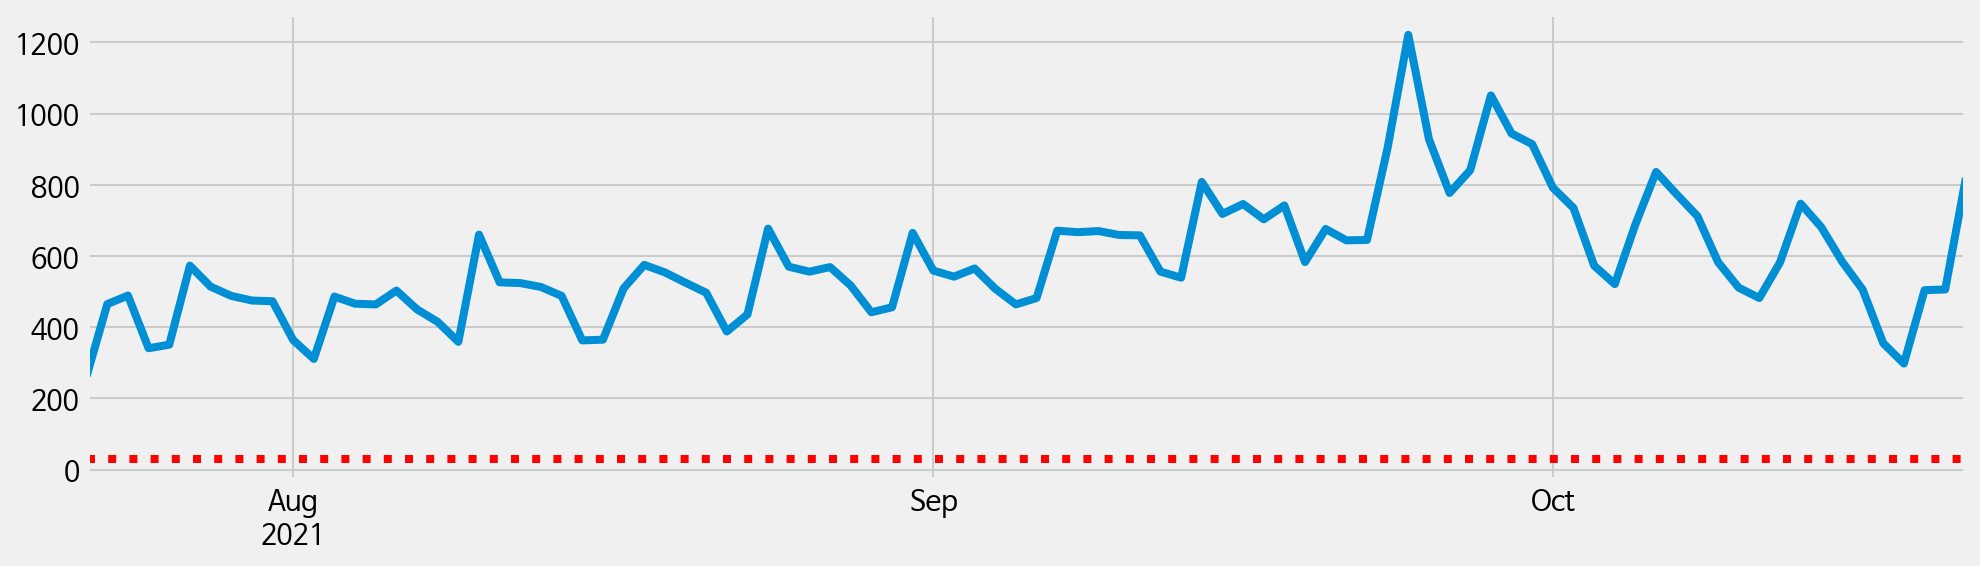

In [76]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

# **실전**

In [77]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [78]:
!apt-get install fonts-nanum -qq  > /dev/null

!fc-cache -fv

 

import matplotlib as mpl

mpl.font_manager._rebuild()

findfont = mpl.font_manager.fontManager.findfont

mpl.font_manager.findfont = findfont

mpl.backends.backend_agg.findfont = findfont

 

font_family = "NanumBarunGothic"

plt.rc("font", family=font_family)

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [79]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19_6_30_.csv"
file_name

'seoul-covid19_6_30_.csv'

In [80]:
df
df.shape

(53800, 10)

In [81]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by="연번", ascending=False)

In [82]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN,2021-10-21,10,42
300,113891,348778,2021-10-21,타시도,-,기타 확진자 접촉,NaN,2021-10-21,10,42
1,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN,2021-10-21,10,42
301,113890,348897,2021-10-21,타시도,-,감염경로 조사중,NaN,2021-10-21,10,42
2,113889,348813,2021-10-21,구로구,-,감염경로 조사중,NaN,2021-10-21,10,42


In [83]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
53795,60396,184518,2021-07-22,송파구,-,감염경로 조사중,퇴원,2021-07-22,7,29
53796,60395,184443,2021-07-22,송파구,-,기타 확진자 접촉,퇴원,2021-07-22,7,29
53797,60394,185139,2021-07-22,노원구,-,감염경로 조사중,퇴원,2021-07-22,7,29
53798,60393,185257,2021-07-22,광진구,-,감염경로 조사중,퇴원,2021-07-22,7,29
53799,60392,184433,2021-07-22,노원구,-,타시도 운동시설 관련,퇴원,2021-07-22,7,29


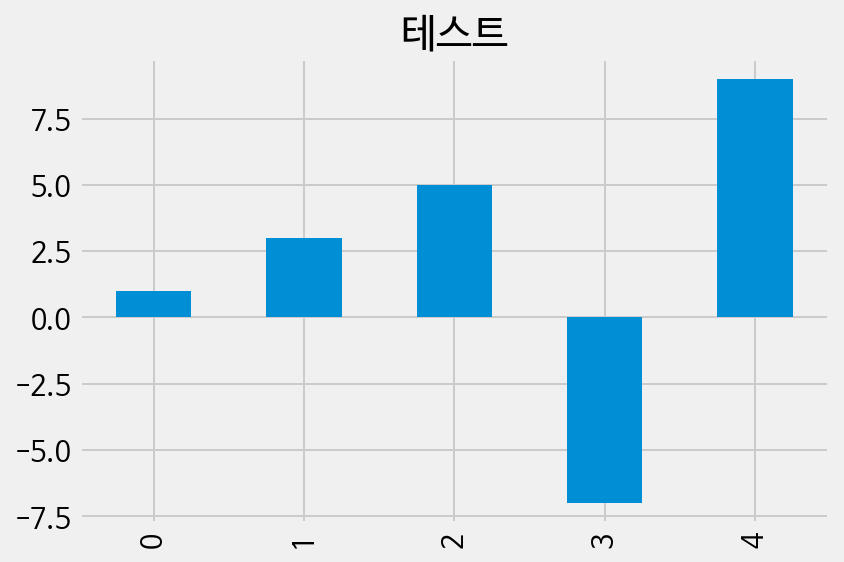

In [134]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

plt.rc("font", family="NanumBarunGothic")
#plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="테스트")

In [85]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# **확진일**

In [86]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

2021-09-24    1221
2021-09-28    1051
2021-09-29     944
2021-09-25     928
2021-09-30     914
              ... 
2021-07-26     351
2021-07-25     341
2021-08-02     311
2021-10-18     298
2021-07-22     263
Name: 확진일, Length: 92, dtype: int64

In [87]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    2021-10-21
Name: 확진일, dtype: object

In [88]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime(df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,2021-10-21,2021-10-21
300,2021-10-21,2021-10-21
1,2021-10-21,2021-10-21
301,2021-10-21,2021-10-21
2,2021-10-21,2021-10-21


In [89]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
53795,2021-07-22,2021-07-22,7
53796,2021-07-22,2021-07-22,7
53797,2021-07-22,2021-07-22,7
53798,2021-07-22,2021-07-22,7
53799,2021-07-22,2021-07-22,7


In [90]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,확진일,확진일자,월,주
0,2021-10-21,2021-10-21,10,42
300,2021-10-21,2021-10-21,10,42
1,2021-10-21,2021-10-21,10,42
301,2021-10-21,2021-10-21,10,42
2,2021-10-21,2021-10-21,10,42


In [91]:
df["확진일자"].value_counts()

2021-09-24    1221
2021-09-28    1051
2021-09-29     944
2021-09-25     928
2021-09-30     914
              ... 
2021-07-26     351
2021-07-25     341
2021-08-02     311
2021-10-18     298
2021-07-22     263
Name: 확진일자, Length: 92, dtype: int64

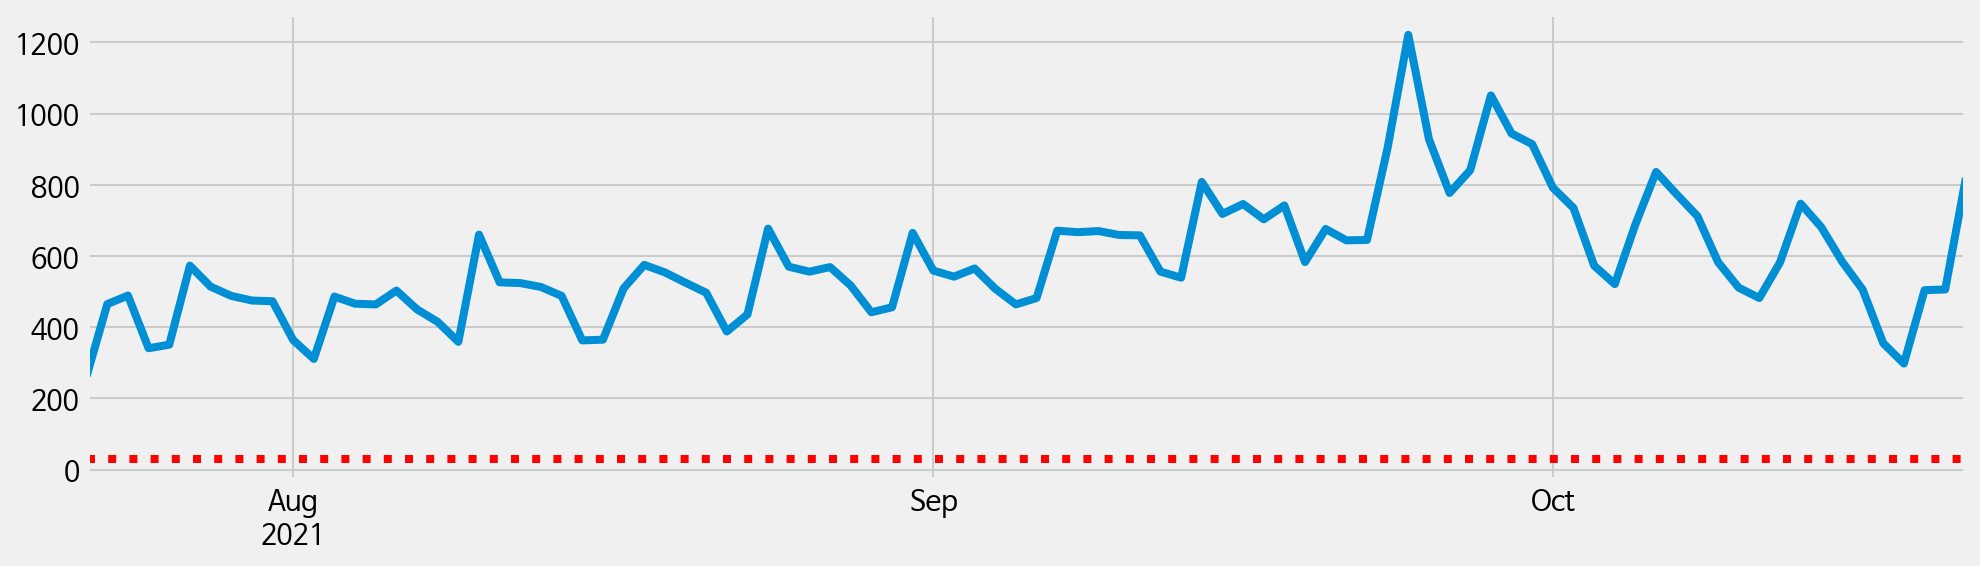

In [92]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

In [93]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

489

In [94]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(i, case_count)

0 263
1 465
2 489
3 341
4 351
5 573
6 514
7 488
8 475
9 473
10 364
11 311
12 486
13 466
14 464
15 503
16 450
17 415
18 359
19 660
20 526
21 524
22 513
23 488
24 363
25 365
26 509
27 575
28 554
29 525
30 497
31 388
32 436
33 677
34 570
35 556
36 569
37 517
38 442
39 456
40 665
41 559
42 542
43 565
44 508
45 464
46 482
47 671
48 667
49 670
50 659
51 658
52 556
53 539
54 808
55 718
56 746
57 703
58 742
59 583
60 676
61 644
62 645
63 904
64 1221
65 928
66 777
67 841
68 1051
69 944
70 914
71 792
72 735
73 573
74 521
75 689
76 836
77 773
78 712
79 583
80 511
81 482
82 582
83 747
84 681
85 585
86 506
87 355
88 298
89 504
90 506
91 819


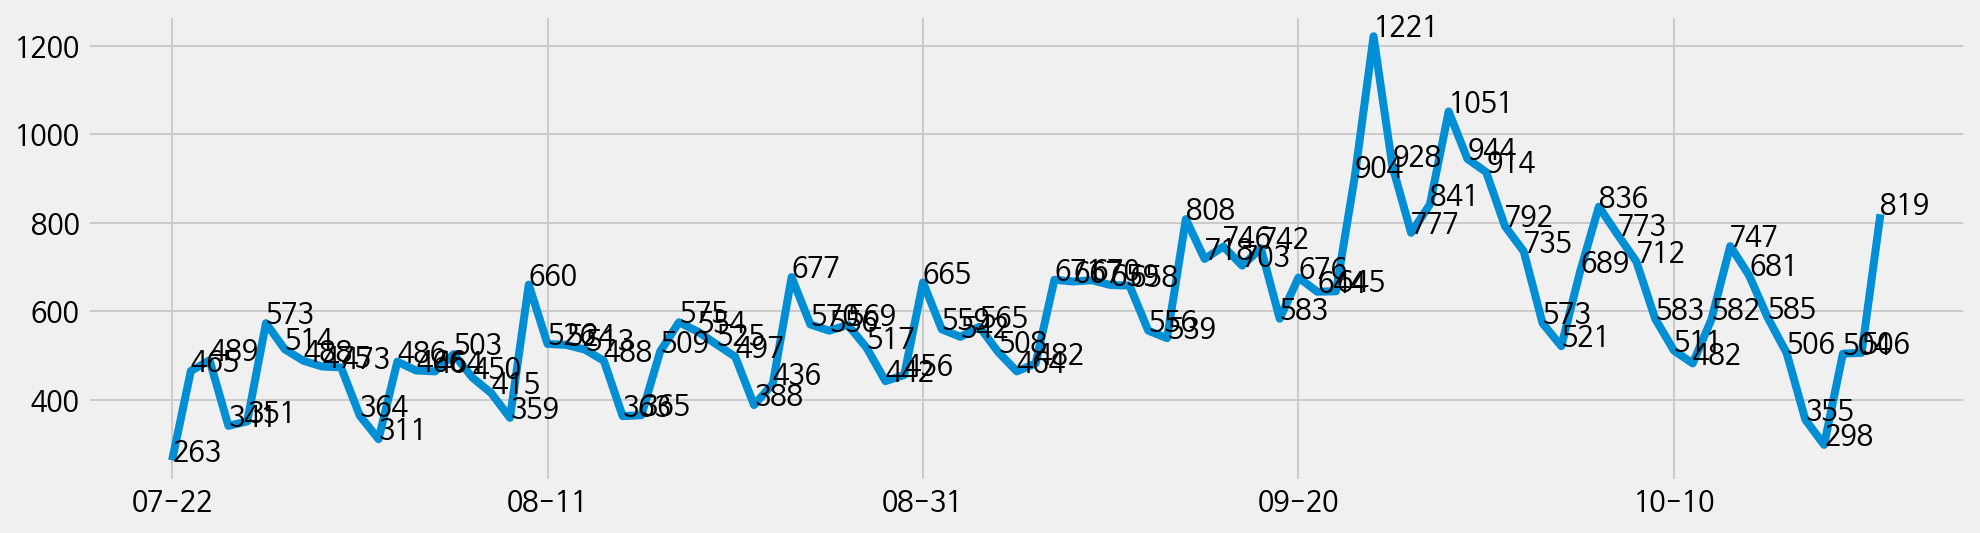

In [169]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

In [96]:
day_count

07-22    263
07-23    465
07-24    489
07-25    341
07-26    351
        ... 
10-17    355
10-18    298
10-19    504
10-20    506
10-21    819
Name: 월일, Length: 92, dtype: int64

In [97]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count      92.000000
mean      584.782609
std       171.067869
min       263.000000
25%       482.000000
50%       555.000000
75%       676.250000
max      1221.000000
Name: 월일, dtype: float64

In [98]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

09-24    1221
Name: 월일, dtype: int64

In [99]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "10-15"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
2988,111203,340158,2021-10-15,노원구,-,감염경로 조사중,NaN,2021-10-15,10,41,10-15
2989,111202,340910,2021-10-15,강북구,-,감염경로 조사중,사망,2021-10-15,10,41,10-15
2990,111201,340932,2021-10-15,영등포구,-,감염경로 조사중,NaN,2021-10-15,10,41,10-15
2991,111200,339389,2021-10-15,구로구,-,감염경로 조사중,NaN,2021-10-15,10,41,10-15
2992,111199,339388,2021-10-15,구로구,-,감염경로 조사중,NaN,2021-10-15,10,41,10-15


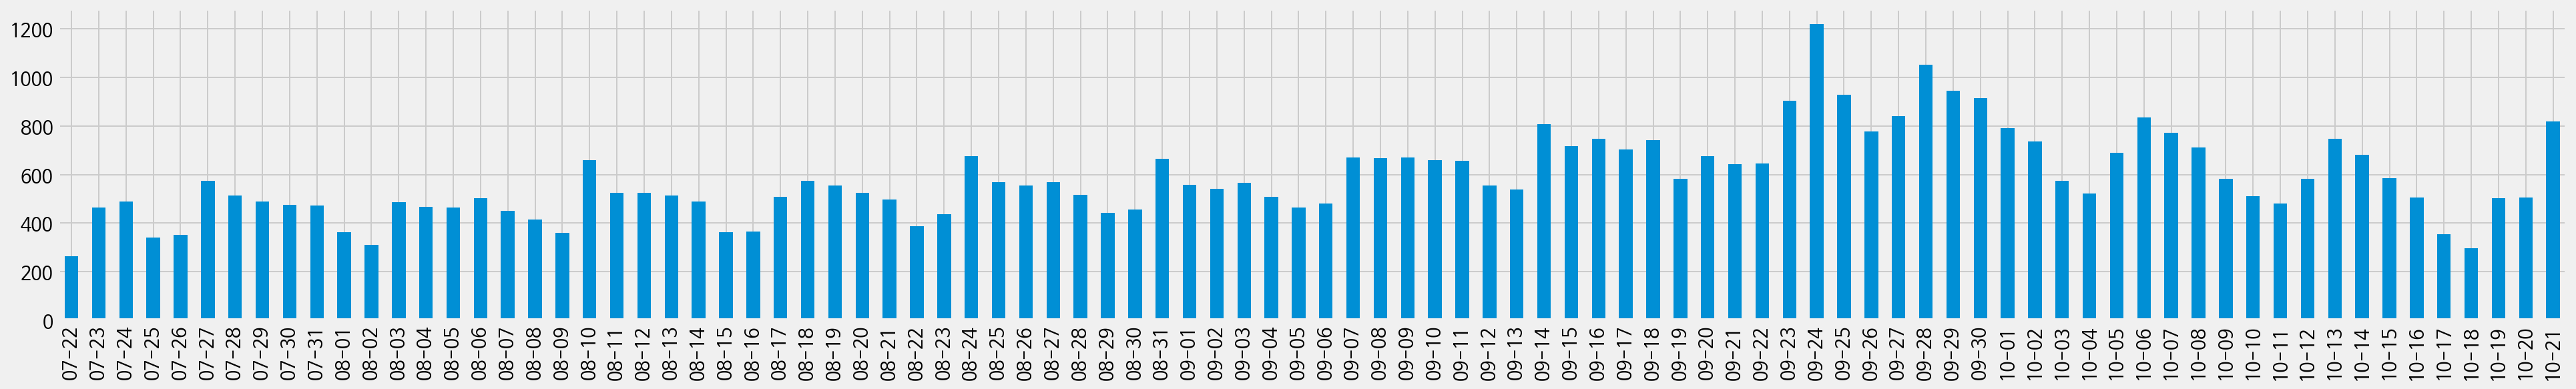

In [100]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

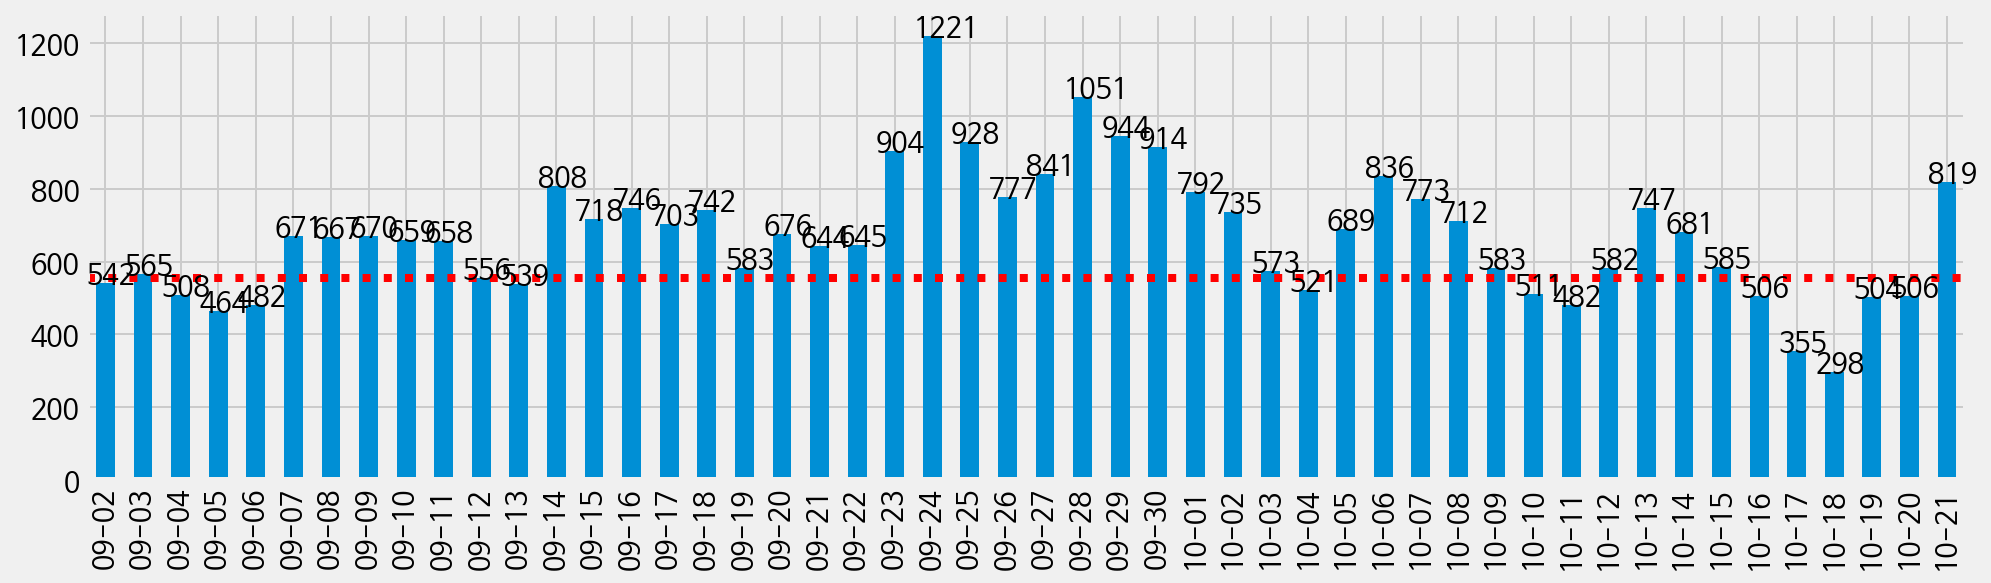

In [167]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")



for i in range(50):
   case_count = day_count[-50:].iloc[i]
   if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

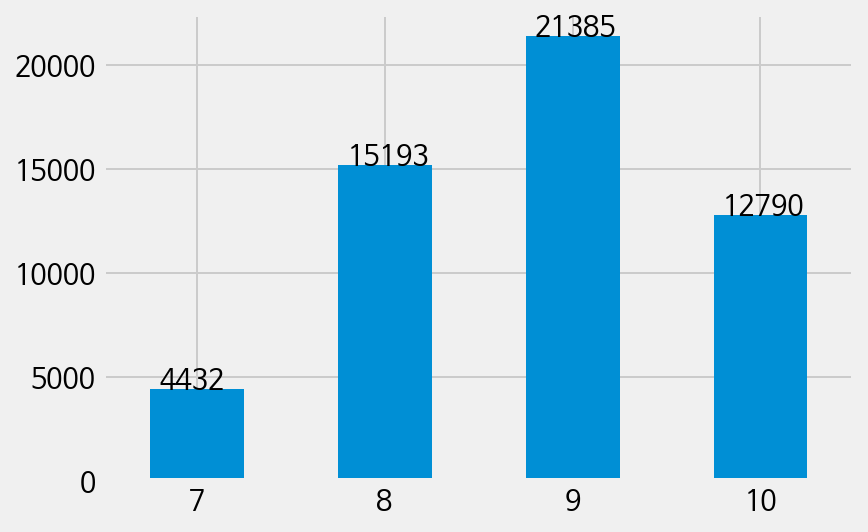

In [103]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

In [104]:
df["주"].value_counts()

39    5850
38    5795
37    4839
40    4625
36    4363
41    3938
34    3767
35    3759
32    3433
33    3413
30    3238
31    3095
42    2127
29    1558
Name: 주, dtype: int64

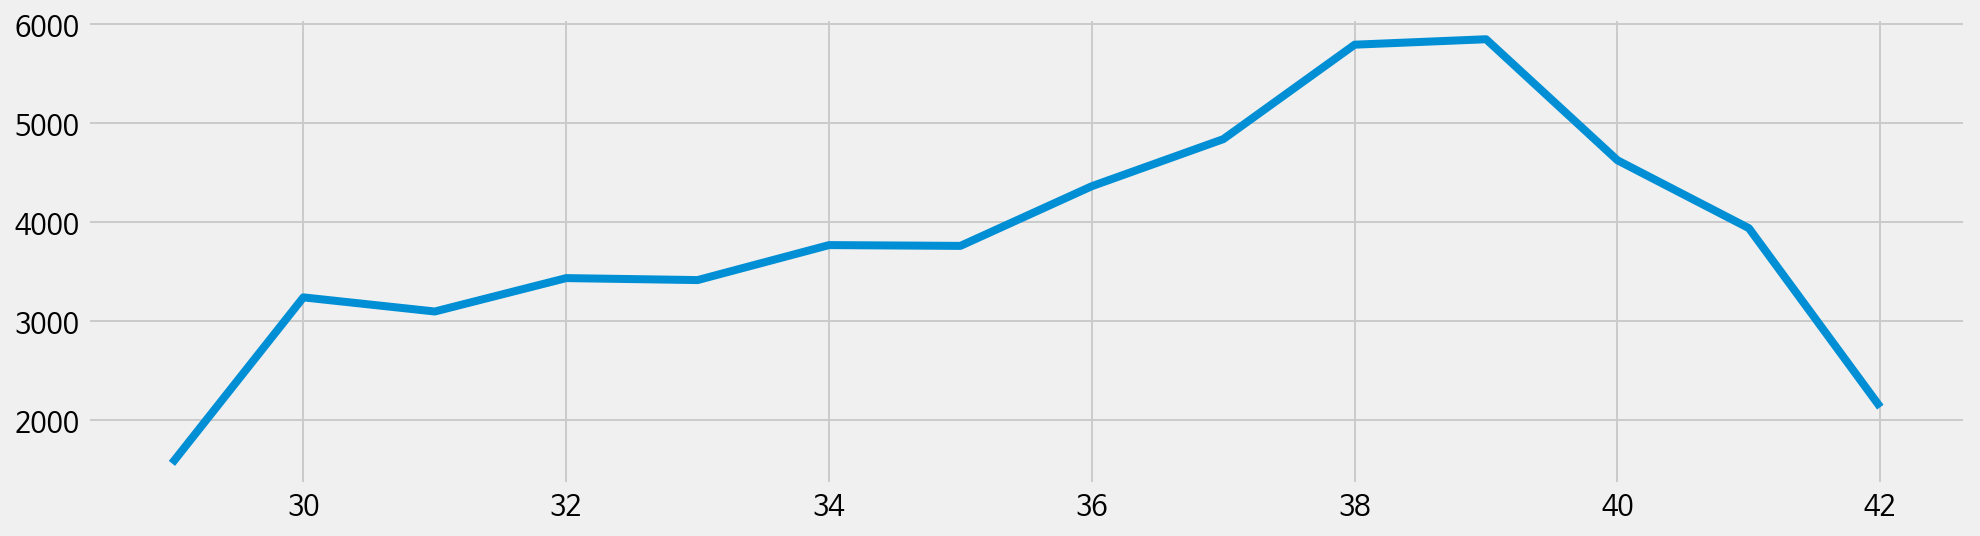

In [105]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

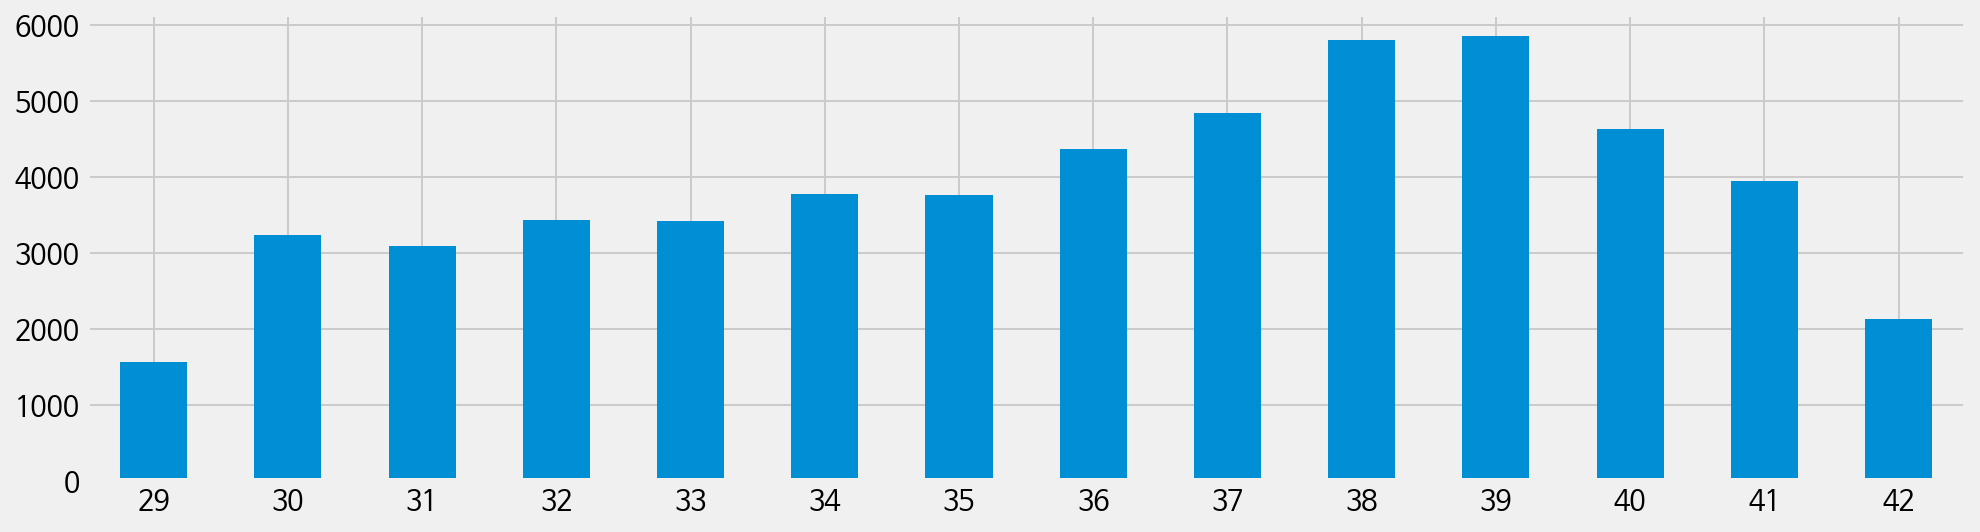

In [106]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

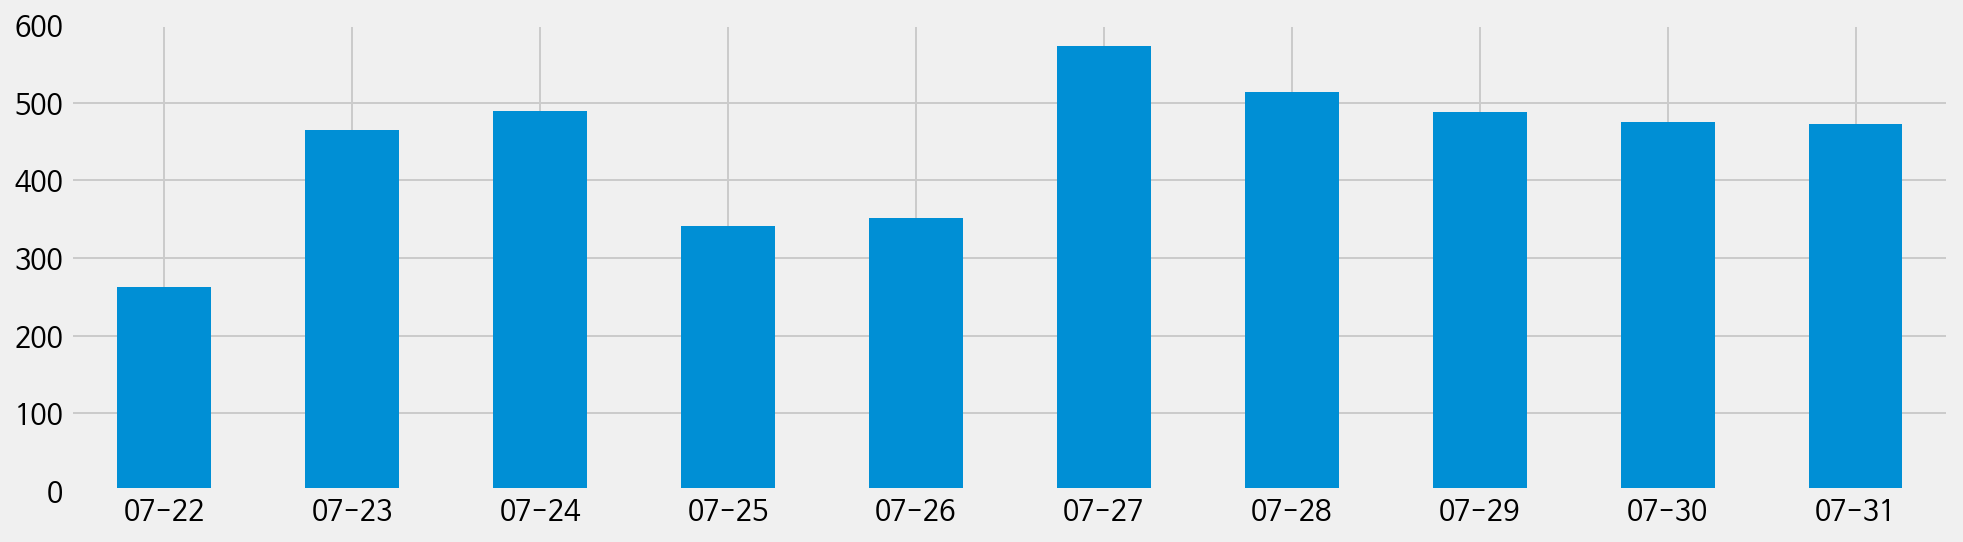

In [161]:
day_count[:10].plot.bar(figsize=(15, 4), rot=0)

In [108]:
first_day = df.iloc[-1, 7]
last_day = df.iloc[0, 7]

In [109]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

%timeit  first_day = df.iloc[-1, 7]

The slowest run took 6.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 55.3 µs per loop


In [110]:
%timeit last_day = df.iloc[0, 7]

The slowest run took 6.33 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 54.9 µs per loop


In [111]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day,last_day)
days[:5]

DatetimeIndex(['2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26'],
              dtype='datetime64[ns]', freq='D')

In [139]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2021-07-22
1,2021-07-23
2,2021-07-24
3,2021-07-25
4,2021-07-26


In [140]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2021-09-24    1221
2021-09-28    1051
2021-09-29     944
2021-09-25     928
2021-09-30     914
Name: 확진일자, dtype: int64

In [141]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2021-09-24,1221
2021-09-28,1051
2021-09-29,944
2021-09-25,928
2021-09-30,914


In [142]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2021-09-24,1221
2021-09-28,1051
2021-09-29,944
2021-09-25,928
2021-09-30,914


In [143]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2021-07-22,263
1,2021-07-23,465
2,2021-07-24,489
3,2021-07-25,341
4,2021-07-26,351


In [144]:
all_day["확진수"].head(10)
all_day["확진수"].fillna(0).cumsum()

0       263
1       728
2      1217
3      1558
4      1909
      ...  
87    51673
88    51971
89    52475
90    52981
91    53800
Name: 확진수, Length: 92, dtype: int64

In [145]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2021-07-22,263,263
1,2021-07-23,465,728
2,2021-07-24,489,1217
3,2021-07-25,341,1558
4,2021-07-26,351,1909
...,...,...,...
87,2021-10-17,355,51673
88,2021-10-18,298,51971
89,2021-10-19,504,52475
90,2021-10-20,506,52981


In [146]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2021-07-22,263,263,07-22
1,2021-07-23,465,728,07-23
2,2021-07-24,489,1217,07-24
3,2021-07-25,341,1558,07-25
4,2021-07-26,351,1909,07-26


In [147]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
07-22,263,263
07-23,465,728
07-24,489,1217
07-25,341,1558
07-26,351,1909


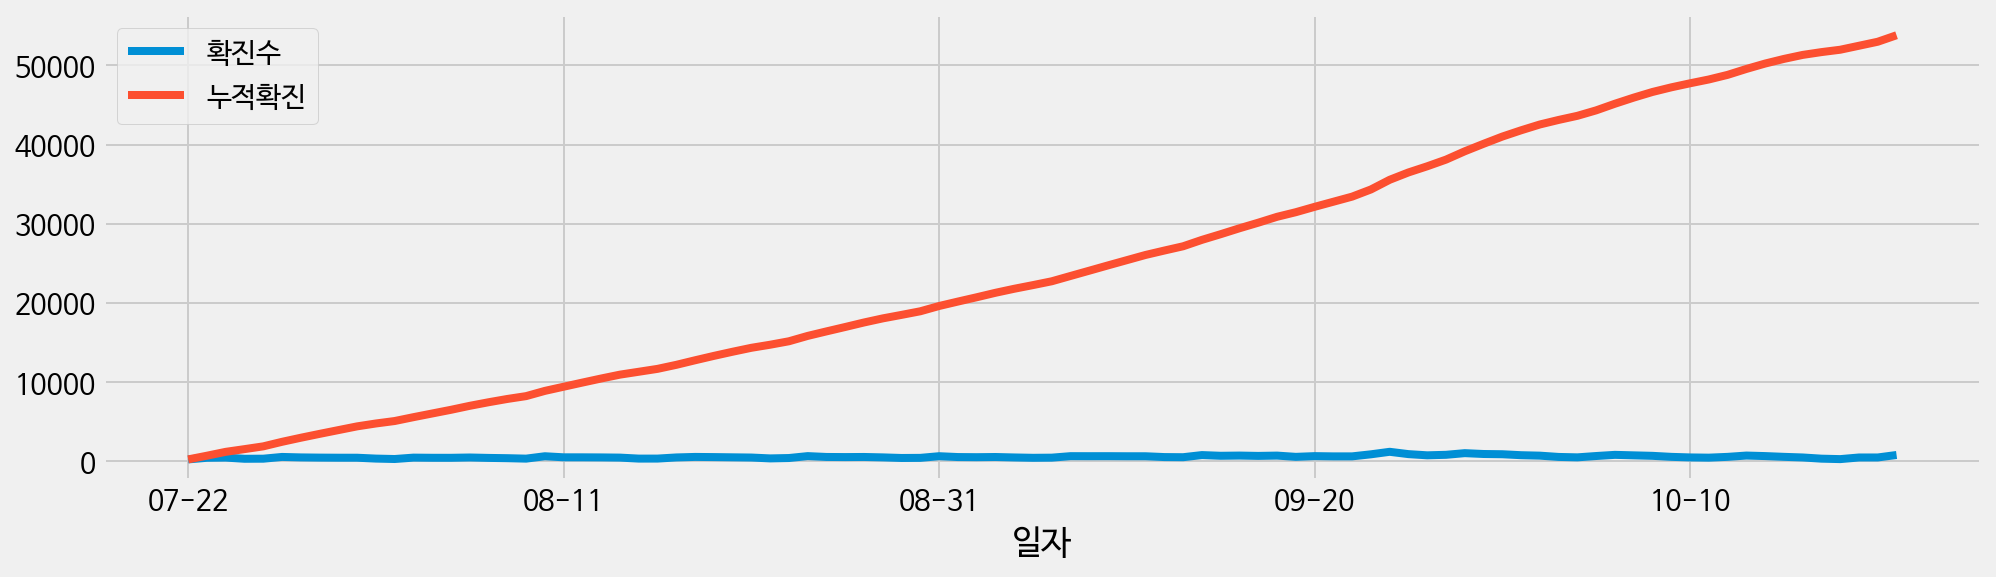

In [148]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

cum_day.plot(figsize=(15, 4))

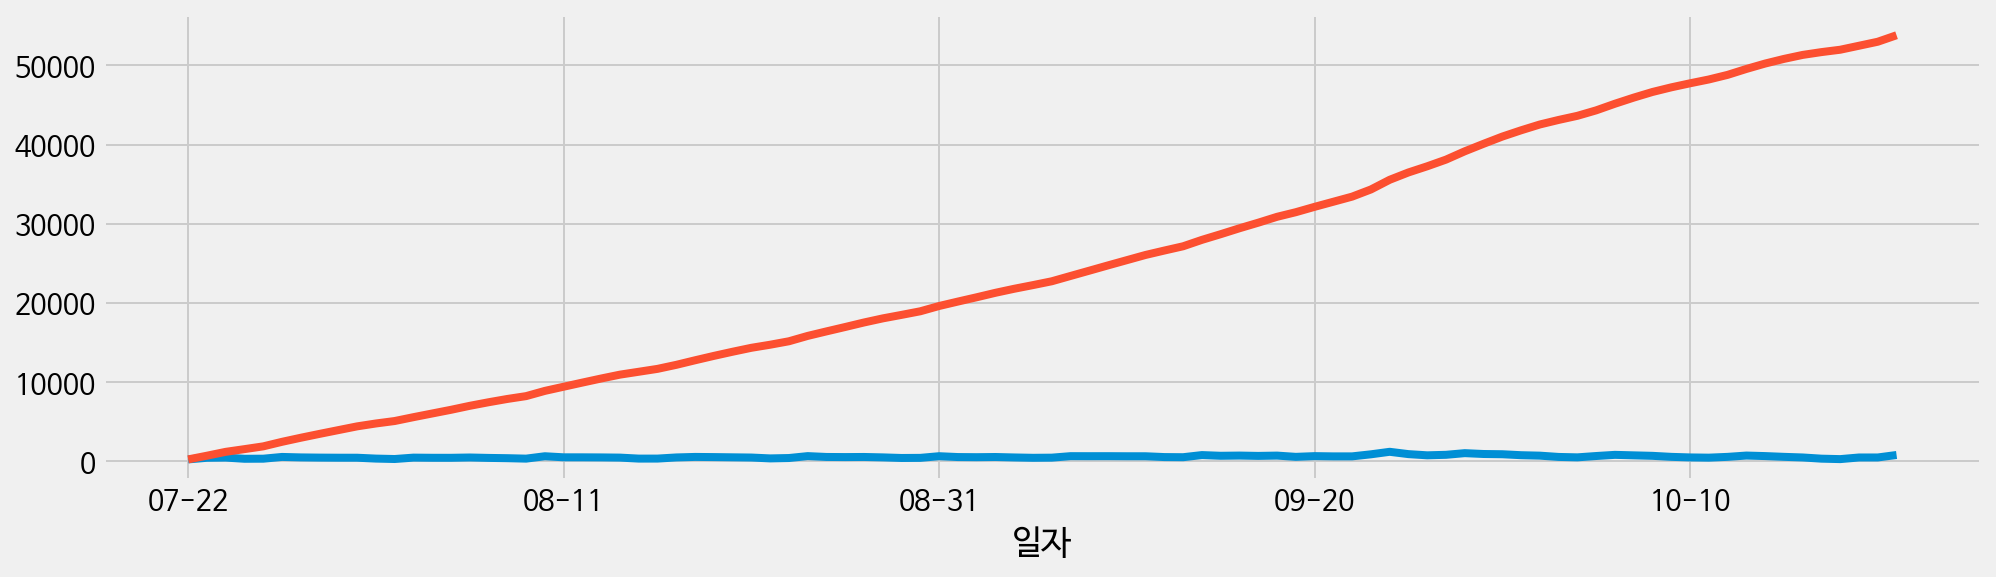

In [149]:
# 시리즈로 2개의 그래프 그리기

cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

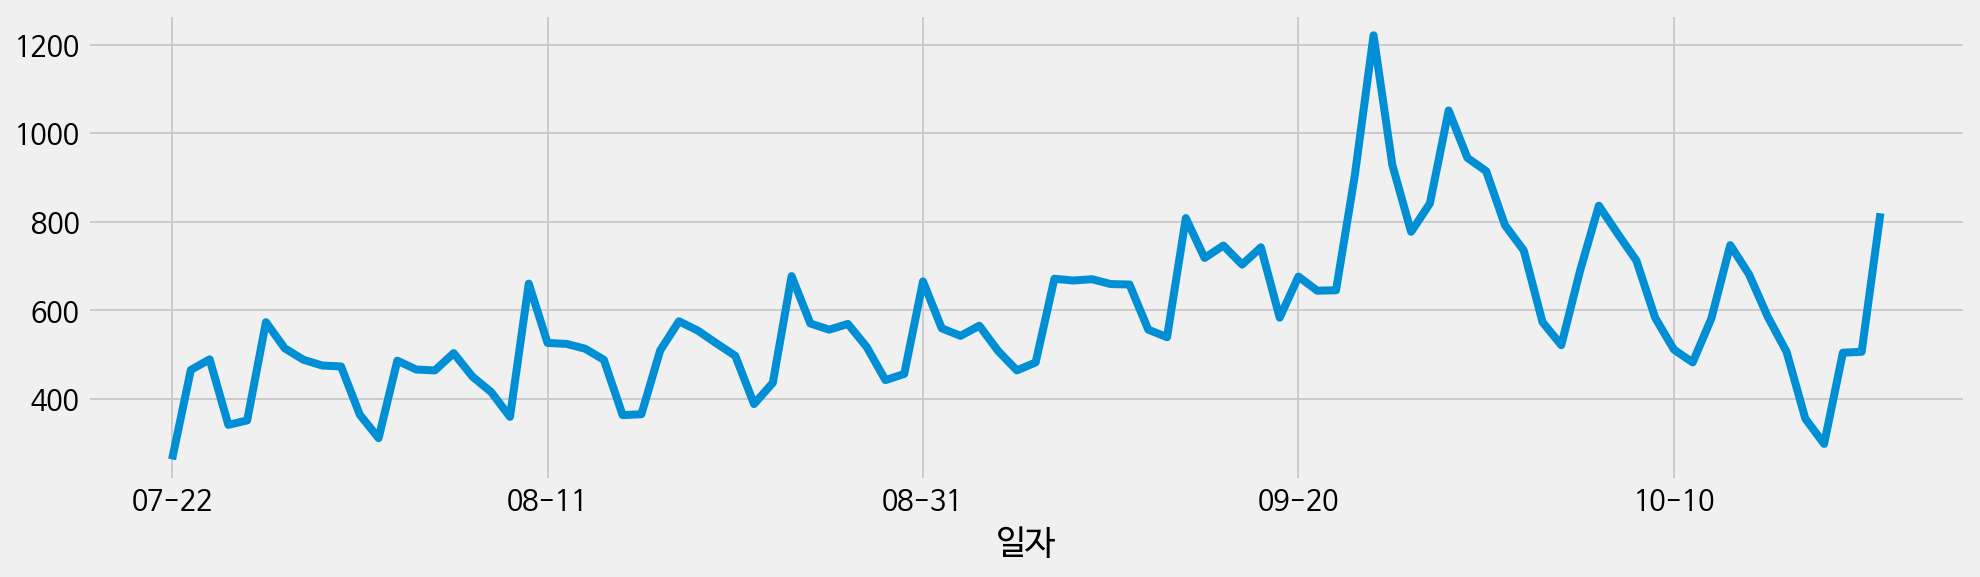

In [150]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15, 4))

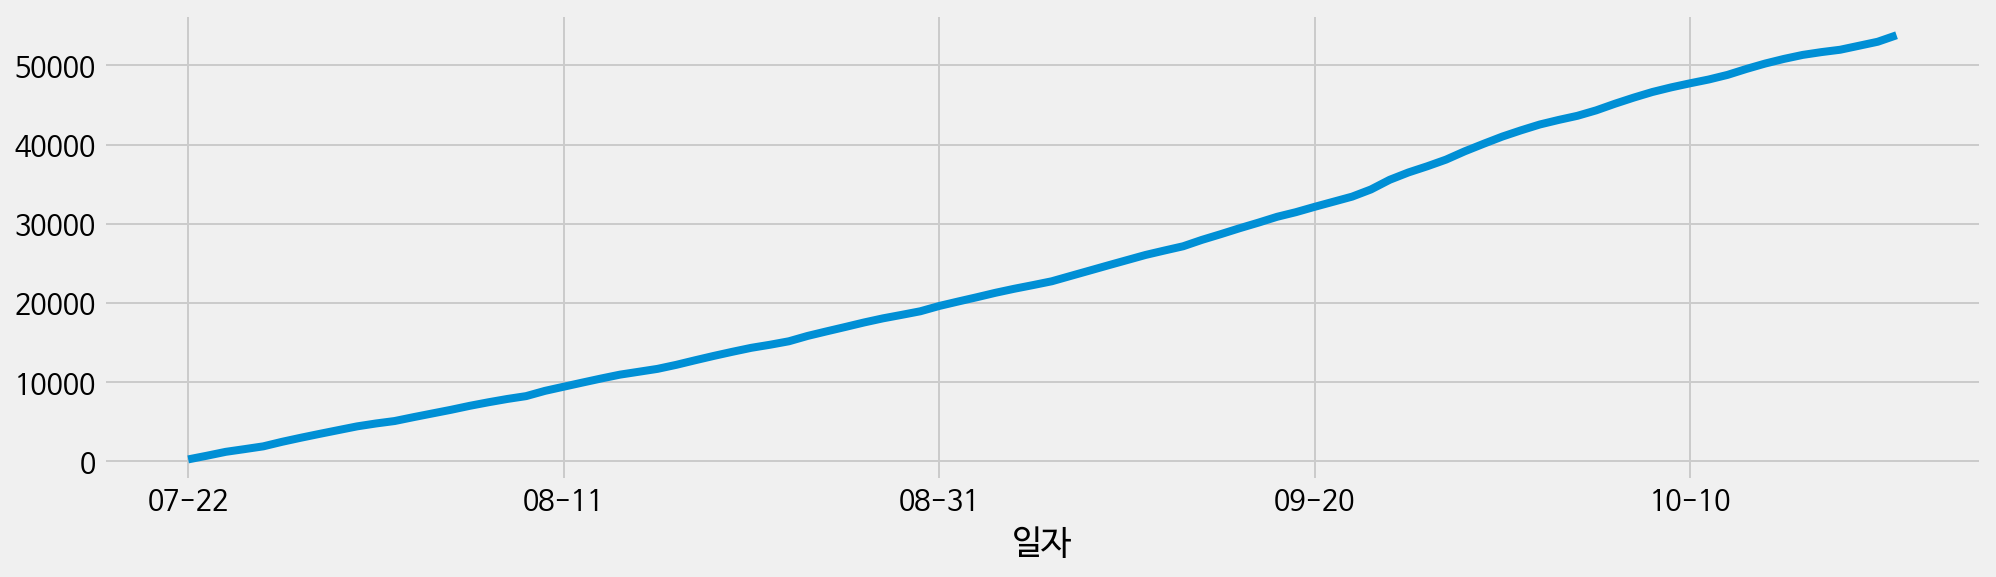

In [151]:
# 누적확진만 따로 그립니다.

cum_day["누적확진"].plot(figsize=(15, 4))

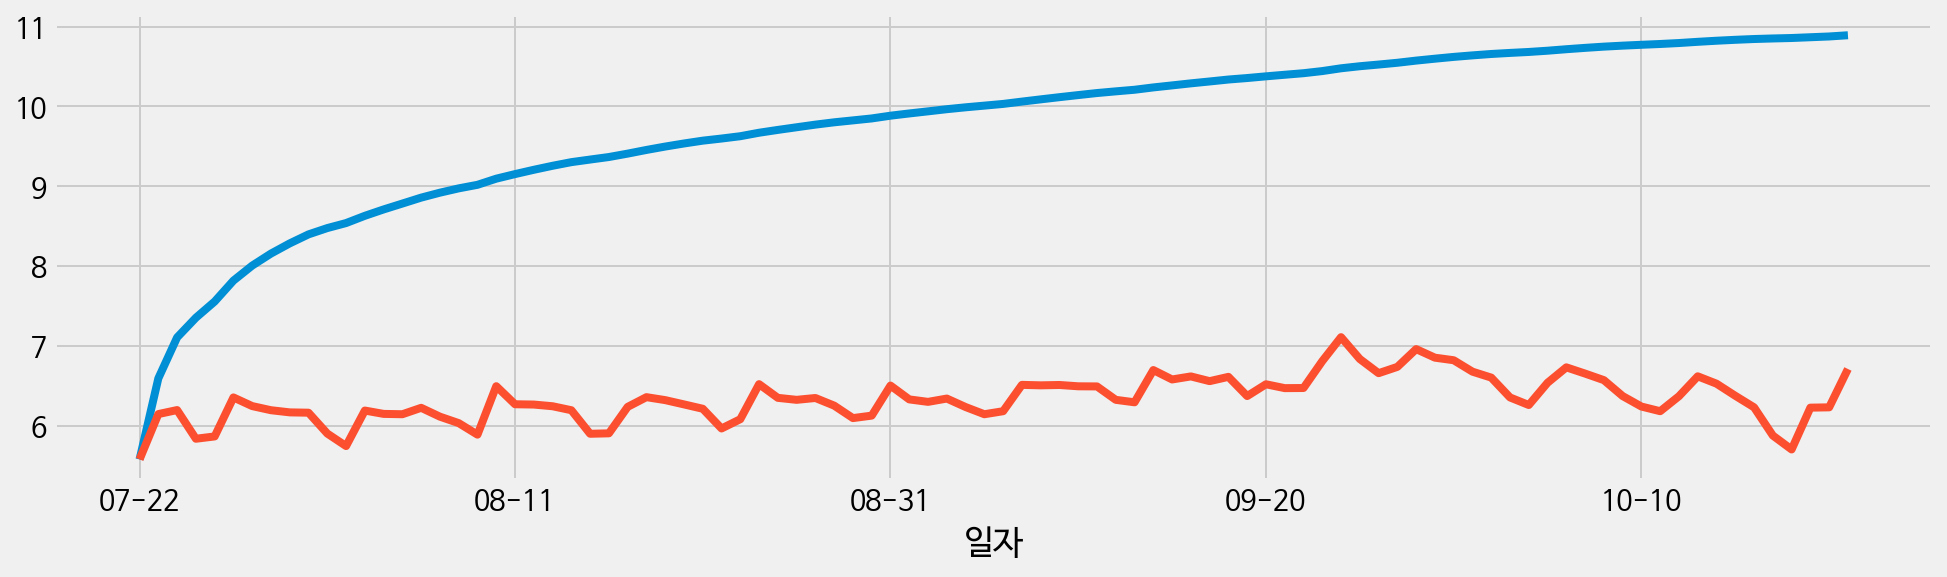

In [152]:
np.log(cum_day["누적확진"]+1).plot(figsize=(15,4))
np.log(cum_day["확진수"]+1).plot()

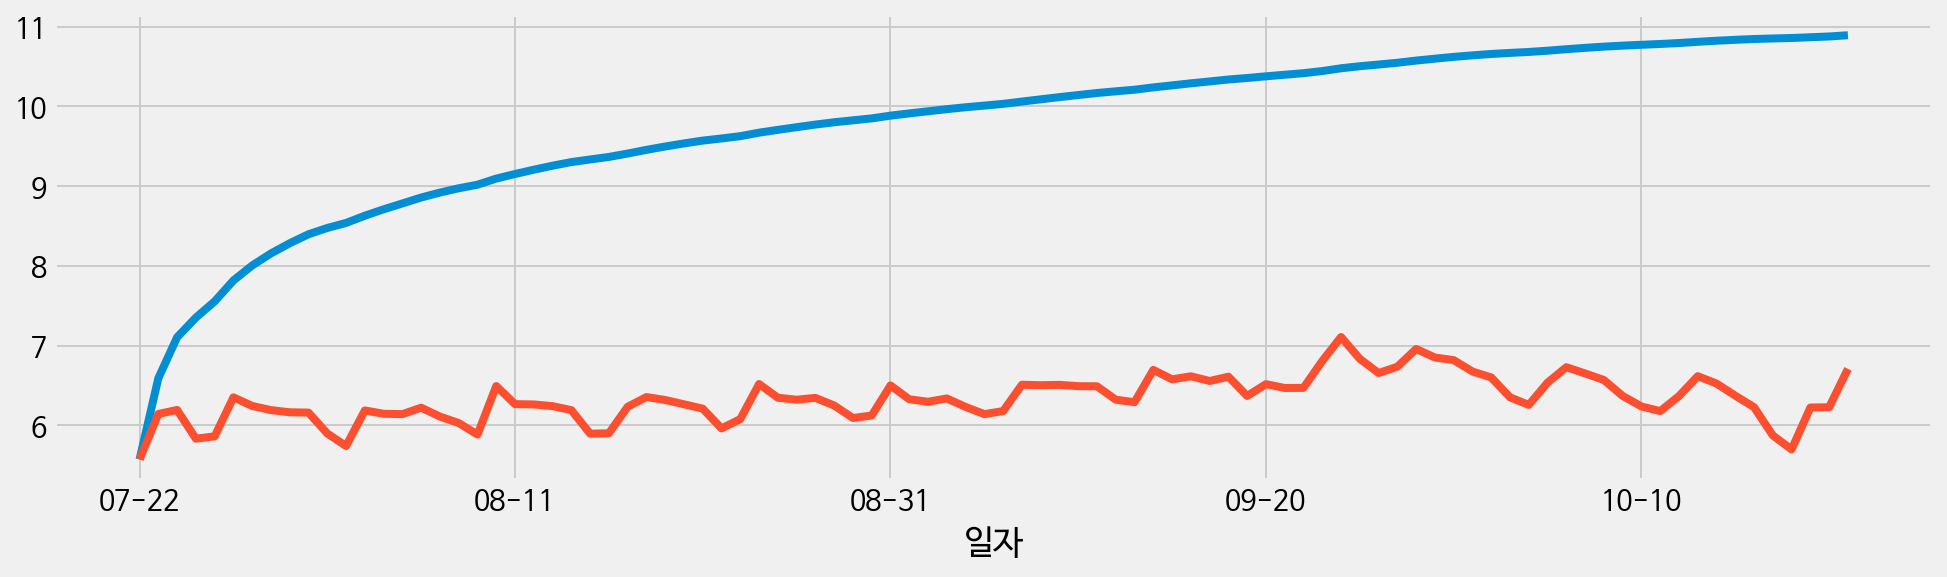

In [153]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot()

In [154]:
# cum_day
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2021-07-22,263,263,07-22,7,3
1,2021-07-23,465,728,07-23,7,4
2,2021-07-24,489,1217,07-24,7,5
3,2021-07-25,341,1558,07-25,7,6
4,2021-07-26,351,1909,07-26,7,0


In [155]:
all_day["확진월"].value_counts

<bound method IndexOpsMixin.value_counts of 0      7
1      7
2      7
3      7
4      7
      ..
87    10
88    10
89    10
90    10
91    10
Name: 확진월, Length: 92, dtype: int64>

In [156]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
7,351,573,514,751,940,962,341
8,1927,2997,2137,2098,2110,1952,1972
9,2538,3174,3533,3776,3148,2836,2380
10,1301,1775,2089,2273,2089,1824,1439


In [157]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [158]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
7,351,573,514,751,940,962,341
8,1927,2997,2137,2098,2110,1952,1972
9,2538,3174,3533,3776,3148,2836,2380
10,1301,1775,2089,2273,2089,1824,1439


In [159]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
7,351,573,514,751,940,962,341
8,1927,2997,2137,2098,2110,1952,1972
9,2538,3174,3533,3776,3148,2836,2380
10,1301,1775,2089,2273,2089,1824,1439


참조 

-사이트: 서울시 코로나 발생 동향
:[링크 텍스트](https://www.seoul.go.kr/coronaV/coronaStatus.do?menu_code=01)

-내일코드 박조은 선생님 수업 

